<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/Image_Thresholding_opencv_python_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Thresholding

## Goal

This tutorial will introduce `Simple Thresholding`, `Adaptive Thresholding`, and `Otsu Threshodling`.

This function are provided by 
* `cv2.threshold`
* `cv2.adaptiveThreshold`

## Simple Thresholding

Here, the matter is very straight forward. (정말 직관적임.)

If pixel value is greater than a specific threshold value, it is assigned an predefined value (commonly, 1 or 255 ~ white), else it is assigned the other value (commonly, 0 ~ black).

The function provided by opencv fot this function is **cv.threshold**.

* First argument is the **souce image**, which should be a grayscale image.
* Second argument is the **threhold value** which is used to classify the pixel value.
* Third arguement is the **maxVal** which represents the value to be given if pixel value is more than (sometimes less than) the threshold value.
* Forth argument is the **styles of thresholding** to be used.

Opencv provides different styles of thresholding and it is decided by the forth parameter of the function. Different types are as follows:

* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV 
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

Documentation clearly explain what each type is meant for. Please check out the documentation.

Two outputs are obtained. First one is a retval which will be explained later. Second output is our thresholded image.



In [1]:
!wget http://www.dacoromania.org/upload/o/24/244843_black-gradient-png.png
!mv 244843_black-gradient-png.png gradient.png

/bin/sh: 1: wget: not found
mv: cannot stat '244843_black-gradient-png.png': 그런 파일이나 디렉터리가 없습니다


In [7]:
!ls

244843_black-gradient-png.png.1  gradient.png  sample_data


> ## Note
> 
>To plot multiple images, we have used plt.subplot() function. Please checkout Matplotlib docs for more > details.

Result is given below :

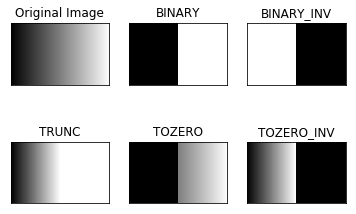

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Adaptive Thresholding


In the previous section, we used a **global value(이미지 모든 영역에 대해)** as threshold value. But it may not be good in all the conditions where **image has different lighting conditions in different areas**. 

In that case, we go for **adaptive thresholding**. In this, 
* the algorithm calculate the threshold for **a small regions of the image**. 
* So we get different thresholds for different regions of the same image and 
* it gives us better results for **images with varying illumination**.

It has three ‘special’ input params and only one output argument.

***Adaptive Method - It decides how thresholding value is calculated.***

* cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
* cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a **gaussian window**.

**Block Size** - It decides the size of neighbourhood area.

**C** - It is just a constant which is subtracted from the mean or weighted mean calculated.



In [9]:
!wget http://aishack.in/static/img/tut/sudoku-original.jpg
!mv sudoku-original.jpg dave.jpg
!ls

--2019-09-05 02:28:26--  http://aishack.in/static/img/tut/sudoku-original.jpg
Resolving aishack.in (aishack.in)... 50.116.7.87
Connecting to aishack.in (aishack.in)|50.116.7.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53178 (52K) [image/jpeg]
Saving to: ‘sudoku-original.jpg’

sudoku-original.jpg 100%[===================>]  51.93K  --.-KB/s    in 0.1s    

2019-09-05 02:28:26 (374 KB/s) - ‘sudoku-original.jpg’ saved [53178/53178]

244843_black-gradient-png.png.1  dave.jpg  gradient.png  sample_data


Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

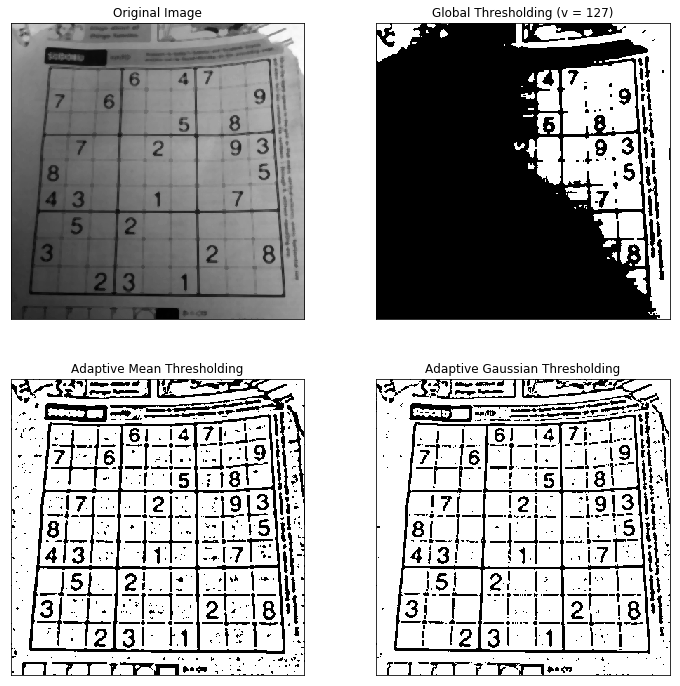

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

 In the first section, I told you there is an unexplained return value, **retVal**. Its use comes when we go for **Otsu’s Binarization**. So what is it?

 In global thresholding, we used an **arbitrary value for threshold value**, right? So, how can we know a value we selected is good or not? Answer is, **trial and error method**. 

 But consider a bimodal image (In simple words, **bimodal image is an image whose histogram has two peaks**). For that image, we can approximately take a value in the middle of those peaks as threshold value, right? That is what Otsu binarization does. 

 So in simple words, it **automatically calculates a threshold value from image histogram for a bimodal image.** (For images which are not bimodal, binarization won’t be accurate.)

 For this, our `cv2.threshold()` function is used, but pass an extra flag, **cv2.THRESH_OTSU**. For threshold value, simply pass zero. Then *the algorithm finds the optimal threshold value and returns you as the first output, __retVal__*. 
* If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. 
* Input image is a noisy image. 
* In first case, I applied global thresholding for a value of 127. 
* In second case, I applied Otsu’s thresholding directly. 
* In third case, I filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. 

See how noise filtering improves the result.

In [16]:
!wget http://lang.sist.chukyo-u.ac.jp/classes/OpenCV/py_tutorials/py_imgproc/py_thresholding/noisy2.png
!ls

--2019-09-05 02:39:03--  http://lang.sist.chukyo-u.ac.jp/classes/OpenCV/py_tutorials/py_imgproc/py_thresholding/noisy2.png
Resolving lang.sist.chukyo-u.ac.jp (lang.sist.chukyo-u.ac.jp)... 150.42.58.7
Connecting to lang.sist.chukyo-u.ac.jp (lang.sist.chukyo-u.ac.jp)|150.42.58.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107903 (105K) [image/png]
Saving to: ‘noisy2.png’

noisy2.png          100%[===================>] 105.37K   216KB/s    in 0.5s    

2019-09-05 02:39:04 (216 KB/s) - ‘noisy2.png’ saved [107903/107903]

244843_black-gradient-png.png.1  gradient.png  sample_data
dave.jpg			 noisy2.png


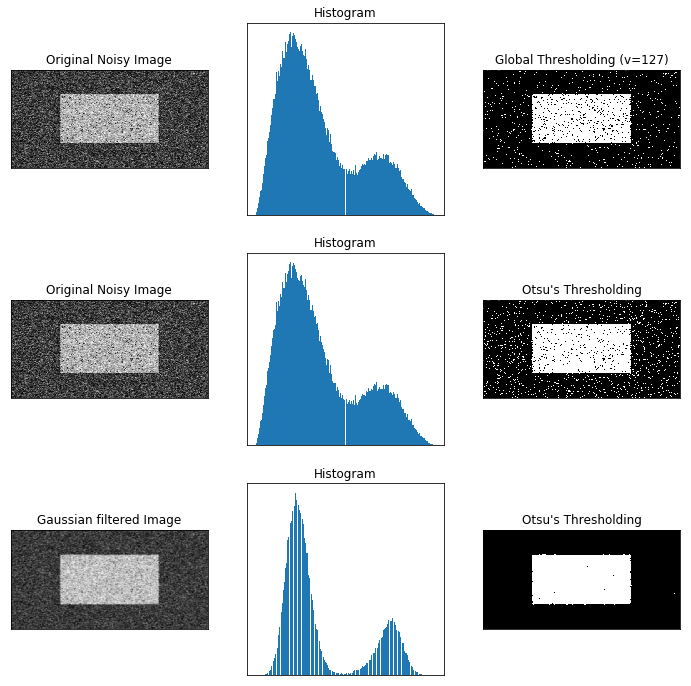

In [19]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## How Otsu's Binarization Works?

This section demonstrates a Python implementation of Otsu's binarization to show how it works actually. If you are not interested, you can skip this.

Since we are working with bimodal images, Otsu's algorithm tries to find a threshold value (t) which minimizes the weighted within-class variance given by the relation :

$$
\sigma_w^2(t) = q_1(t)\sigma_1^2(t)+q_2(t)\sigma_2^2(t)
$$

where

$$
q_1(t) = \sum_{i=1}^{t} P(i) \quad \& \quad q_1(t) = \sum_{i=t+1}^{I} P(i) \\
\mu_1(t) = \sum_{i=1}^{t} \frac{iP(i)}{q_1(t)} \quad \& \quad \mu_2(t) = \sum_{i=t+1}^{I} \frac{iP(i)}{q_2(t)} \\
\sigma_1^2(t) = \sum_{i=1}^{t} [i-\mu_1(t)]^2 \frac{P(i)}{q_1(t)} \quad \& \quad \sigma_2^2(t) = \sum_{i=t+1}^{I} [i-\mu_1(t)]^2 \frac{P(i)}{q_2(t)}
$$

It actually finds a value of t which lies in between two peaks such that variances to both classes are minimum. It can be simply implemented in Python as follows:

In [21]:
img = cv2.imread('noisy2.png',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

118 117.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


## References

* [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)
* Digital Image Processing, Rafael C. Gonzalez